# <center><b> Practice 2: PRACTICE 2: PREDICTING PRODUCT SALES</b><center>

### <b>Problem</b>: An e-commerce company wants to predict the sales of their products to optimize inventory management and marketing strategies.

---

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

## 1. Data Understanding

In [2]:
df = pd.read_csv('../data/amazon_products_sales_data_uncleaned.csv')
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [3]:
# Data information
print(f"Shape: {df.shape}\n")
print(df.info())
print(df.describe().T)

Shape: (42675, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  pr

---

### Dataset Attributes Explanation

**1. `title`** : Tên sản phẩm

**2. `rating`** : Điểm đánh giá trung bình (1–5)

**3. `number_of_reviews`**: Tổng lượt đánh giá

**4. `bought_in_last_month`**: Số lượng bán trong tháng gần nhất

**5. `current/discounted_price`**: Giá hiện tại hoặc giá sau giảm

**6. `price_on_variant`**: Giá theo từng biến thể (màu, size, loại,...)

**7. `listed_price`**: Giá niêm yết ban đầu

**8. `is_best_seller`**: Cờ cho biết sản phẩm có thuộc Best Seller hay không

**9. `is_sponsored`**: Sản phẩm có phải quảng cáo hay không

**10. `is_couponed`**: Sản phẩm đang áp dụng coupon hay không

**11. `buy_box_availability`**: Trạng thái sở hữu Buy Box

**12. `delivery_details`**: Thông tin giao hàng (thời gian, hình thức...)

**13. `sustainability_badges`**: Nhãn bền vững hoặc chứng nhận môi trường

**14. `image_url`**: Liên kết hình ảnh sản phẩm

**15. `product_url`**: Liên kết đến trang chi tiết sản phẩm

**16. `collected_at`**: Thời điểm thu thập dữ liệu


---

---

## 2. Data Preparation

In [4]:
# Tỷ lệ missing data
round(df.isna().sum() / df.shape[0] * 100, 2).sort_values(ascending=False)

sustainability_badges       92.01
buy_box_availability        34.34
current/discounted_price    27.53
delivery_details            27.46
bought_in_last_month         7.54
product_url                  4.85
number_of_reviews            2.40
rating                       2.40
is_best_seller               0.00
listed_price                 0.00
price_on_variant             0.00
title                        0.00
is_sponsored                 0.00
is_couponed                  0.00
image_url                    0.00
collected_at                 0.00
dtype: float64

### 2.1. Handle Label

In [5]:
# Hiện tại dữ liệu hàng nhìn đang được để là 'k' -> chuyển về lại dạng số
tmp = df['bought_in_last_month'].astype(str).str.extract(r'(\d+(?:\.\d+)?)(K?)')

# Chuyển về dạng số bằng các replace 'k', fillna = 1
df['bought_in_last_month'] = (
    pd.to_numeric(tmp[0], errors='coerce') *
    tmp[1].map({'K': 1000}).fillna(1)
)

# Số lượng người mua là 1 số nguyên nên ép kiểu về int
df['bought_in_last_month'] = df['bought_in_last_month'].round().astype('Int64')

### 2.2. Handle Features

In [6]:
# Extract `rating` from `ratings` column
df['rating'] = df['rating'].str.split(' ', expand=True)[0].astype('float')

In [7]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,"2,457",6000,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,"3,044",2000,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,"35,882",10000,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,"28,988",10000,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [8]:
# Clean number_of_reviews 
# Xoá dấu ','
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: ''.join(str(x).split(',')))

# Change dtype
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce').astype('Int64')

In [9]:
# Clear current/discounted_price
df['current/discounted_price'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')

In [10]:
# Clean price_on_variant

# Nếu dữ liệu có ký tự '$'-> giá tiền thì ép về str, vì cột này chứa 1 vài giá trị không phải giá
df['price_on_variant'] = df['price_on_variant'].apply(lambda x: x if '$' in str(x) else None)

# Replace các ký tự != số và ép kiểu float
df['price_on_variant'] = df['price_on_variant'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

In [11]:
# Clean listed_price
df['listed_price'] = df['listed_price'].replace('No Discount', None).replace(r'[^0-9.]', '', regex=True).astype(float)

In [12]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,NaN,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,9.99,NaN,15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,314.00,NaN,349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882,10000,NaN,162.24,NaN,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988,10000,NaN,72.74,NaN,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [13]:
# Category feature (is_best_seller, is_sponsored, is_couponed)

# Sử dụng unique để xem các category có trong cột
print(f"Unique values is_best_seller: \n{df['is_best_seller'].unique()}\n") # One-hot
print(f"Unique values is_sponsored: \n{df['is_sponsored'].unique()}\n")
print(f"Unique values is_couponed: \n{df['is_couponed'].unique()}\n")

# Change dtype
df['is_sponsored'] = df['is_sponsored'].astype('category')

# Clean is_couponed
df['is_couponed'] = df['is_couponed'].apply(lambda x: 1 if str(x) != 'No Coupon' else 0) # Chuyển về binary

Unique values is_best_seller: 
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']

Unique values is_sponsored: 
['Sponsored' 'Organic']

Unique values is_couponed: 
['Save 15%  with coupon' 'No Coupon' 'Save 50%  with coupon'
 'Save $16.00  with coupon' 'Save $10.00  with coupon'
 'Save 10%  with coupon' 'Save $20.00  with coupon'
 'Save $4.00  with coupon' 'Save $0.33  with coupon'
 'Save $18.00  with coupon' 'Save 5%  with coupon'
 'Save $2.00  with coupon' 'Save $15.00  with coupon'
 'Save 6%  with coupon' 'Save $8.00  with coupon'
 'Save $40.00  with coupon' 'Save $1.50  with coupon'
 'Save 7%  with coupon' 'Save 20%  with coupon' 'Save $1.00  with coupon'
 'Save $5.00  with coupon' 'Save $30.00  with coupon'
 'Save $12.00  with coupon' 'Save 25%  with coupon'
 'Save $133.00  with coupon' 'Save $50.00  with coupon'
 'Save $11.00  with coupon' 'Save 30%  with coupon'
 'Save $3.00  with cou

In [14]:
print(f"Unique values is_best_seller: \n{df['is_best_seller'].unique()}\n")
print(f"Unique values is_sponsored: \n{df['is_sponsored'].unique()}\n")
print(f"Unique values is_couponed: \n{df['is_couponed'].unique()}\n")

Unique values is_best_seller: 
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']

Unique values is_sponsored: 
['Sponsored', 'Organic']
Categories (2, object): ['Organic', 'Sponsored']

Unique values is_couponed: 
[1 0]



### 2.3. Fillna & Dropna, ...

In [15]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,89.68,NaN,159.00,No Badge,Sponsored,1,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,9.99,NaN,15.99,No Badge,Sponsored,0,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,314.00,NaN,349.00,No Badge,Sponsored,0,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882,10000,NaN,162.24,NaN,Best Seller,Organic,0,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988,10000,NaN,72.74,NaN,No Badge,Organic,0,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [16]:
'''
Thứ tự fillna:
1. Giá hiện tại = giá gốc, giá hiện tại = giá sản phẩm theo loại hàng (nếu gốc null), = median (nếu giá sản phẩm theo loại hàng null)
2. Giá sản phẩm theo loại hàng = giá gốc, = median (nếu giá gốc null)
'''

# Fillna 'current/discounted_price'
df['current/discounted_price'] = df['current/discounted_price'].fillna(df['listed_price'])
df['current/discounted_price'] = df['current/discounted_price'].fillna(df['price_on_variant'])
df['current/discounted_price'] = df['current/discounted_price'].fillna(df['current/discounted_price'].median())

# Fillna listed_price
df['listed_price'] = df['listed_price'].fillna(df['current/discounted_price'])
df['listed_price'] = df['listed_price'].fillna(df['listed_price'].median())

# Fillna price_in_variant
df['price_on_variant'] = df['price_on_variant'].fillna(df['current/discounted_price'])
df['price_on_variant'] = df['price_on_variant'].fillna(df['price_on_variant'].median())

In [17]:
# Fillna rating and number_of_reviews
df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) # fillna bằng giá trị xuất hiện nhiều nhất
df['number_of_reviews'] = df['number_of_reviews'].fillna(df['number_of_reviews'].median()) # fillna bằng giá trị trung bình

In [18]:
# Xoá các cột không sử dụng trong mô hình
df = df.drop(columns=['title', 'buy_box_availability', 'delivery_details', 'sustainability_badges', 'image_url', 'product_url', 'collected_at'])
df = df.dropna(axis=0, how='any')   # Xoá các dòng có giá trị nan

# Loại bỏ trùng lập
df = df.drop_duplicates()
df.shape

(8322, 9)

In [19]:
df

,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed
0,4.6,375,300,89.68,89.68,159.00,No Badge,Sponsored,1
1,4.3,2457,6000,9.99,9.99,15.99,No Badge,Sponsored,0
2,4.6,3044,2000,314.00,314.00,349.00,No Badge,Sponsored,0
3,4.6,35882,10000,162.24,162.24,162.24,Best Seller,Organic,0
4,4.8,28988,10000,72.74,72.74,72.74,No Badge,Organic,0
...,...,...,...,...,...,...,...,...,...
42027,3.8,119218,2000,34.99,34.99,37.99,No Badge,Sponsored,0
42042,5.0,17,100,22.61,22.61,26.66,Limited time deal,Sponsored,0
42043,4.6,137630,10000,39.99,39.99,44.99,Amazon's,Sponsored,0
42214,4.4,17060,4000,15.87,15.87,15.87,No Badge,Sponsored,0


'\n- Xét từ label thì chỉ có number_of_review là có độ tương quan cao nhất, còn lại thấp.\n- Các cột về giá có độ tương quan cao với nhau. \n'

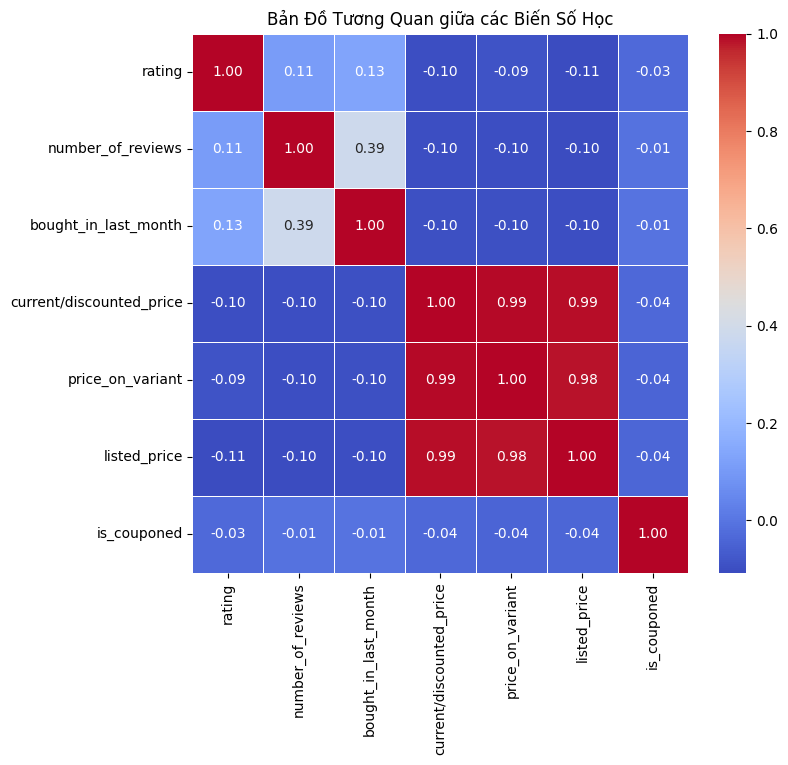

In [20]:
# Chọn các cột numeric để vẽ
df_numerical = df.select_dtypes(include=['int64', 'float'])
numeric_cols = df_numerical.columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Bản Đồ Tương Quan giữa các Biến Số Học')

'''
- Xét từ label thì chỉ có number_of_review là có độ tương quan cao nhất, còn lại thấp.
- Các cột về giá có độ tương quan cao với nhau. 
'''

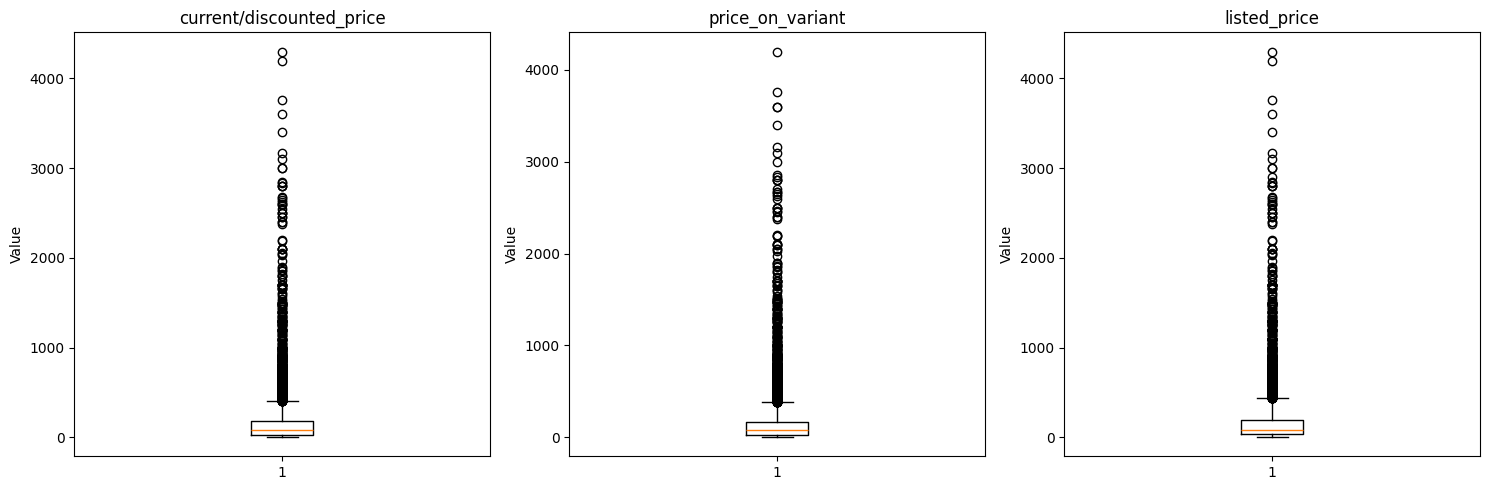

In [21]:
price_cols = ['current/discounted_price', 'price_on_variant', 'listed_price']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, price_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel("Value")

plt.tight_layout()

# Bị nhiều giá trị ngoại lai => nên log

In [22]:
'''
[number_of_reviews, bought_in_last_month, is_couponed, price_on_variant, current/discounted_price, listed_price] bị skew mạnh 
'''
df_numerical.skew()

rating                      -1.133549
number_of_reviews           16.041413
bought_in_last_month        12.165553
current/discounted_price      5.57295
price_on_variant             5.629609
listed_price                 5.321663
is_couponed                  6.302002
dtype: Float64

---

## 3. Feature Engineering

In [23]:
df.head()

,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed
0,4.6,375,300,89.68,89.68,159.00,No Badge,Sponsored,1
1,4.3,2457,6000,9.99,9.99,15.99,No Badge,Sponsored,0
2,4.6,3044,2000,314.00,314.00,349.00,No Badge,Sponsored,0
3,4.6,35882,10000,162.24,162.24,162.24,Best Seller,Organic,0
4,4.8,28988,10000,72.74,72.74,72.74,No Badge,Organic,0


In [24]:
# Giảm skew của dữ liệu
cols_to_log = [
    'number_of_reviews',
    'bought_in_last_month',
    'price_on_variant',
    'current/discounted_price',
    'listed_price'
]

for col in cols_to_log:
    df[f'log_{col}'] = np.log1p(df[col])

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [26]:
categorical_cols = ['is_best_seller', 'is_sponsored', 'is_couponed']
numeric_cols = ['rating', 'log_number_of_reviews', 'log_current/discounted_price', 'log_price_on_variant', 'log_listed_price']

In [27]:
X = df.drop(columns='log_bought_in_last_month')
y = df['log_bought_in_last_month']

In [28]:
# Encode feature
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
)

In [29]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## 4. Model Selection

In [30]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, lr=0.001, n_iters=1000):
        """
        lr      : learning rate
        n_iters : số lần cập nhật gradient
        """
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Huấn luyện model bằng Gradient Descent.
        """
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        n_samples, n_features = X.shape

        # Khởi tạo weight & bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Dự đoán
            y_pred = np.dot(X, self.weights) + self.bias

            # Tính gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weight
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Dự đoán giá trị đầu ra.
        """
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """
        Tính R² Score = 1 - (RSS / TSS)
        """
        y = np.array(y, dtype=float)
        y_pred = self.predict(X)

        ss_res = np.sum((y - y_pred) ** 2)      # residual sum of squares
        ss_tot = np.sum((y - y.mean()) ** 2)   # total sum of squares

        return 1 - (ss_res / ss_tot)

## 5. Model Training

In [31]:
lr = LinearRegressionScratch()  # Gọi model

# Training
lr.fit(X_train_processed, y_train)

In [32]:
y_pred = lr.predict(X_test_processed)   # Predict

## 6. Model Evaluation

In [33]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error
)

In [34]:
r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true = np.where(y_true == 0, 1, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("R²:", r2)    # Độ giải thích
print("MAE:", mae)  # Sai số tuyệt đối
print("MSE:", mse)  # Sai số bình phương trung bình
print("RMSE:", rmse) # Sai số bình phương
print("MedAE:", medae) # Sai số trung vị
print("MAPE:", mape(y_test, y_pred)) # Sai số %

R²: 0.22701130816497284
MAE: 0.9096259998500047
MSE: 1.5170453620461994
RMSE: 1.2316839537991064
MedAE: 0.7141049242247686
MAPE: 14.671897077140239
